


# **1. DATASET CREATION**

In [ ]:
!ls /content/

biinary  checkpoints  data.zip	sample_data  test


In [ ]:
!unzip /content/data.zip -d /content/extracted_folder/

Archive:  /content/data.zip
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/01_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/02_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/03_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/04_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/05_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/06_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/07_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/08_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/09_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/10_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/11_049.png  
  inflating: /content/extracted_folder/sign_data/Dataset/test/049/12_049.png  
  inflating: /content/ex

In [ ]:
!ls /content/extracted_folder/sign_data/Dataset/train

001	  012_forg  019       025_forg	032	  038_forg  045       051_forg	058	  064_forg
001_forg  013	    019_forg  026	032_forg  039	    045_forg  052	058_forg  065
002	  013_forg  020       026_forg	033	  039_forg  046       052_forg	059	  065_forg
002_forg  014	    020_forg  027	033_forg  040	    046_forg  053	059_forg  066
003	  014_forg  021       027_forg	034	  040_forg  047       053_forg	060	  066_forg
003_forg  015	    021_forg  028	034_forg  041	    047_forg  054	060_forg  067
004	  015_forg  022       028_forg	035	  041_forg  048       054_forg	061	  067_forg
004_forg  016	    022_forg  029	035_forg  042	    048_forg  055	061_forg  068
006	  016_forg  023       029_forg	036	  042_forg  049       055_forg	062	  068_forg
006_forg  017	    023_forg  030	036_forg  043	    049_forg  056	062_forg  069
009	  017_forg  024       030_forg	037	  043_forg  050       056_forg	063	  069_forg
009_forg  018	    024_forg  031	037_forg  044	    050_forg  057	063_forg
012	  018_forg  025       0

In [ ]:
!cp /content/extracted_folder/sign_data/Dataset/train/{001..069}_forg/* /content/biinary/fake/

cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/005_forg/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/007_forg/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/008_forg/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/010_forg/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/011_forg/*': No such file or directory


In [ ]:
!cp /content/extracted_folder/sign_data/Dataset/train/{001..069}/* /content/biinary/real/

cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/005/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/007/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/008/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/010/*': No such file or directory
cp: cannot stat '/content/extracted_folder/sign_data/Dataset/train/011/*': No such file or directory


#**CHECKING NUMBER OF REAL AND FAKE IMAGES**

In [ ]:
!ls /content/biinary/real | wc -l

887


In [ ]:
!ls /content/biinary/fake | wc -l

762


In [ ]:
!find /content/biinary/real -type f -iname "*.PNG" -exec rename 's/\.PNG$/.png/' {} \;


In [ ]:
!find /content/biinary/fake -type f -iname "*.PNG" -exec rename 's/\.PNG$/.png/' {} \;


In [ ]:
rm -rf /content/biinary/fake/ipynb_checkpoints

# ***PREPARING DATASET AND IMPORTING TORCH***

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader
import os


In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os

class SignatureDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []

        # Iterate over real and fake folders
        for label, class_name in enumerate(["real", "fake"]):
            class_dir = os.path.join(root_dir, class_name)
            if not os.path.exists(class_dir):
                print(f"Warning: {class_dir} not found.")
                continue
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                if img_path.lower().endswith(('png', 'jpg', 'jpeg')):
                    self.data.append((img_path, label))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_path, label = self.data[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, torch.tensor(label, dtype=torch.long)


# **DATA NORMALIZATION**

In [ ]:
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


# ***SPECIFYING TRAINING DATASET AND LABELLING***

In [ ]:
train_dir = '/content/biinary/'
train_dataset = SignatureDataset(root_dir=train_dir, transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

print(f"Total images: {len(train_dataset)}")
print("Example batch:")
images, labels = next(iter(train_loader))
print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")


Total images: 1649
Example batch:
Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])


In [ ]:
class_names = ['Fake', 'Real']
print(f"Class Names: {class_names}")


Class Names: ['Fake', 'Real']


# ***PLOTTING A FEW LABELLED IMAGES***

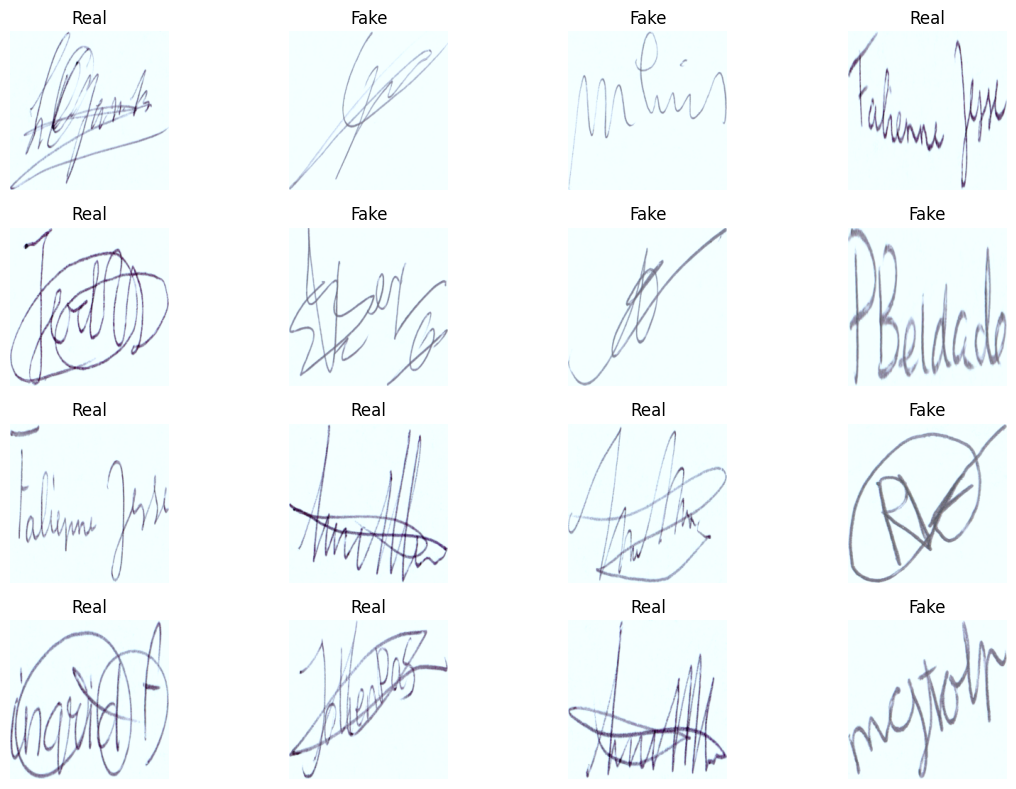

In [ ]:
import matplotlib.pyplot as plt

def show_images(images, labels, class_names=['Fake', 'Real']):
    plt.figure(figsize=(12, 8))
    for i in range(min(16, len(images))):  # Show up to 16 images
        plt.subplot(4, 4, i+1)
        img = images[i].permute(1, 2, 0).numpy()  # Convert to (H, W, C)
        img = img * 0.229 + 0.485  # Denormalize using mean and std
        img = img.clip(0, 1)  # Clip to valid range

        label = class_names[labels[i].item()]
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize first batch
images, labels = next(iter(train_loader))
show_images(images, labels)


**Notebook link Using GAN - Generative Adversarial Network**



[Notebook Link](https://colab.research.google.com/drive/1IaBfbk8wvS54_07zRHSMfLG6Ylv6ogbv#scrollTo=tLyUGWLWFTc5)

# 2.**MODEL TRAINING & CLASSIFICATION**

# **LOADING RESNET18 AND TRAINING THE MODEL**

In [ ]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Device Configuration (Ensure GPU is used if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data Paths
train_dir = '/content/biinary/'

# Data Transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

train_dataset = SignatureDataset(root_dir=train_dir, transform=data_transforms)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


# Load Pretrained ResNet18
model = models.resnet18(pretrained=True)

# Freeze all layers except the last layer
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer with a Sigmoid for binary classification
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()  # Output single value between 0 and 1
)

model = model.to(device)

# Loss and Optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Training Loop
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)  # Convert labels to float for BCE Loss

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Calculate predictions (using 0.5 threshold for sigmoid)
            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
            running_loss += loss.item()

        scheduler.step()

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 * correct / total

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%")

        # Save Model Checkpoint
        checkpoint_path = f'checkpoints/resnet18_epoch_{epoch+1}.pth'
        torch.save({
            'epoch': epoch+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': epoch_loss,
            'accuracy': epoch_acc
        }, checkpoint_path)
        print(f"Model saved at {checkpoint_path}")

    print("Training completed.")
    return model


trained_model = train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs=10)


Using device: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 197MB/s]


Epoch [1/10], Loss: 0.4936, Accuracy: 80.65%
Model saved at checkpoints/resnet18_epoch_1.pth
Epoch [2/10], Loss: 0.3082, Accuracy: 90.05%
Model saved at checkpoints/resnet18_epoch_2.pth
Epoch [3/10], Loss: 0.2571, Accuracy: 91.09%
Model saved at checkpoints/resnet18_epoch_3.pth
Epoch [4/10], Loss: 0.2211, Accuracy: 92.84%
Model saved at checkpoints/resnet18_epoch_4.pth
Epoch [5/10], Loss: 0.2124, Accuracy: 92.54%
Model saved at checkpoints/resnet18_epoch_5.pth
Epoch [6/10], Loss: 0.1825, Accuracy: 94.48%
Model saved at checkpoints/resnet18_epoch_6.pth
Epoch [7/10], Loss: 0.1762, Accuracy: 93.88%
Model saved at checkpoints/resnet18_epoch_7.pth
Epoch [8/10], Loss: 0.1691, Accuracy: 94.12%
Model saved at checkpoints/resnet18_epoch_8.pth
Epoch [9/10], Loss: 0.1629, Accuracy: 94.42%
Model saved at checkpoints/resnet18_epoch_9.pth
Epoch [10/10], Loss: 0.1665, Accuracy: 94.72%
Model saved at checkpoints/resnet18_epoch_10.pth
Training completed.





##1.  ***Data Augmentation on Training set***
##2.  ***Resize and Normalize on Validation set***
##3.  ***Model Training***







In [ ]:
from torch.utils.data import random_split
import os

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data Paths
train_dir = '/content/biinary/'

# Data Augmentation for Training Set
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Only Resize and Normalize for Validation Set (No Augmentation)
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Dataset
full_dataset = SignatureDataset(root_dir=train_dir, transform=None)

# Split into Train and Validation Sets (80% Train, 20% Validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_dataset.dataset.transform = train_transforms
val_dataset.dataset.transform = val_transforms

print(f"Train Size: {len(train_dataset)}, Validation Size: {len(val_dataset)}")

Using device: cuda
Train Size: 1319, Validation Size: 330


In [ ]:
!rm -rf /content/checkpoints

Epoch [1/10]
Train Loss: 0.5164, Train Accuracy: 78.47%
Val Loss: 0.3786, Val Accuracy: 89.70%
Model saved at checkpoints_new/resnet18_epoch_1.pth

Epoch [2/10]
Train Loss: 0.3323, Train Accuracy: 89.23%
Val Loss: 0.2623, Val Accuracy: 93.03%
Model saved at checkpoints_new/resnet18_epoch_2.pth

Epoch [3/10]
Train Loss: 0.2696, Train Accuracy: 91.36%
Val Loss: 0.2444, Val Accuracy: 92.12%
Model saved at checkpoints_new/resnet18_epoch_3.pth

Epoch [4/10]
Train Loss: 0.2380, Train Accuracy: 92.57%
Val Loss: 0.1915, Val Accuracy: 94.55%
Model saved at checkpoints_new/resnet18_epoch_4.pth

Epoch [5/10]
Train Loss: 0.2260, Train Accuracy: 92.27%
Val Loss: 0.1707, Val Accuracy: 95.76%
Model saved at checkpoints_new/resnet18_epoch_5.pth

Epoch [6/10]
Train Loss: 0.2135, Train Accuracy: 93.25%
Val Loss: 0.1566, Val Accuracy: 96.67%
Model saved at checkpoints_new/resnet18_epoch_6.pth

Epoch [7/10]
Train Loss: 0.1871, Train Accuracy: 93.93%
Val Loss: 0.1497, Val Accuracy: 96.36%
Model saved at ch

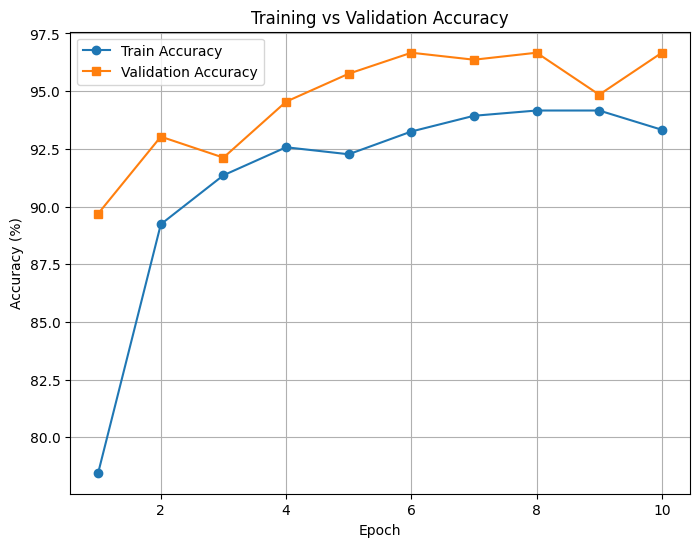

In [ ]:
import matplotlib.pyplot as plt
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Load Pretrained ResNet18
model = models.resnet18(pretrained=True)

# Freeze all layers except the last layer
for param in model.parameters():
    param.requires_grad = False

# Replace the final layer with a Sigmoid for binary classification
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)

model = model.to(device)

# Loss and Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10):
    os.makedirs('checkpoints_new', exist_ok=True)

    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            labels = labels.float().unsqueeze(1)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Validation Phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                labels = labels.float().unsqueeze(1)

                outputs = model(images)
                loss = criterion(outputs, labels)

                predictions = (outputs > 0.5).float()
                val_correct += (predictions == labels).sum().item()
                val_total += labels.size(0)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_acc = 100 * val_correct / val_total

        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

        # Save Model Checkpoint
        checkpoint_path = f'checkpoints_new/resnet18_epoch_{epoch+1}.pth'
        torch.save({
            'epoch': epoch+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'train_loss': train_loss,
            'train_accuracy': train_acc,
            'val_loss': val_loss,
            'val_accuracy': val_acc
        }, checkpoint_path)
        print(f"Model saved at {checkpoint_path}\n")

        scheduler.step()

    print("Training completed.")

    # Plot Training & Validation Accuracy
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy', marker='s')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    return model

# Start Training
trained_model = train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=10)


# **PREPARING TEST DATA**

# ***Loading Test Directory***

In [ ]:
!ls /content/extracted_folder/sign_data/Dataset/test

049	  051_forg  054       056_forg	059	  061_forg  064       066_forg	069
049_forg  052	    054_forg  057	059_forg  062	    064_forg  067	069_forg
050	  052_forg  055       057_forg	060	  062_forg  065       067_forg
050_forg  053	    055_forg  058	060_forg  063	    065_forg  068
051	  053_forg  056       058_forg	061	  063_forg  066       068_forg


In [ ]:
!cp /content/extracted_folder/sign_data/Dataset/test/{049..069}_forg/* /content/test/fake

In [ ]:
!ls /content/test/fake

01_0101066.PNG	01_0202053.PNG	02_0115053.PNG	03_0102061.PNG	03_0203064.PNG	04_0116062.PNG
01_0102054.PNG	01_0202055.PNG	02_0115056.PNG	03_0104051.PNG	03_0204050.PNG	04_0117057.PNG
01_0102061.PNG	01_0203064.PNG	02_0116062.PNG	03_0104059.PNG	03_0205067.PNG	04_0118055.PNG
01_0104051.PNG	01_0204050.PNG	02_0117057.PNG	03_0104063.PNG	03_0206049.PNG	04_0118065.PNG
01_0104059.PNG	01_0205067.PNG	02_0118055.PNG	03_0105056.PNG	03_0206061.PNG	04_0119063.PNG
01_0104063.PNG	01_0206049.PNG	02_0118065.PNG	03_0105064.PNG	03_0206065.PNG	04_0120051.PNG
01_0105056.PNG	01_0206061.PNG	02_0119063.PNG	03_0106052.PNG	03_0207052.PNG	04_0120055.PNG
01_0105064.PNG	01_0206065.PNG	02_0120051.PNG	03_0106069.PNG	03_0207053.PNG	04_0121060.PNG
01_0106052.PNG	01_0207052.PNG	02_0120055.PNG	03_0107053.PNG	03_0207054.PNG	04_0124054.PNG
01_0106069.PNG	01_0207053.PNG	02_0121060.PNG	03_0108063.PNG	03_0208054.PNG	04_0124068.PNG
01_0107053.PNG	01_0207054.PNG	02_0124054.PNG	03_0108069.PNG	03_0208057.PNG	04_0125050.PNG
01_0108063

In [ ]:
!ls /content/extracted_folder/sign_data/Dataset/test

049	  051_forg  054       056_forg	059	  061_forg  064       066_forg	069
049_forg  052	    054_forg  057	059_forg  062	    064_forg  067	069_forg
050	  052_forg  055       057_forg	060	  062_forg  065       067_forg
050_forg  053	    055_forg  058	060_forg  063	    065_forg  068
051	  053_forg  056       058_forg	061	  063_forg  066       068_forg


In [ ]:
!cp /content/extracted_folder/sign_data/Dataset/test/{049..069}/* /content/test/real

In [ ]:
!cp /content/extracted_folder/sign_data/Dataset/test/{049..069}_forg/* /content/test/fake

In [ ]:
!ls /content/test/fake/

01_0101066.PNG	01_0202053.PNG	02_0115053.PNG	03_0102061.PNG	03_0203064.PNG	04_0116062.PNG
01_0102054.PNG	01_0202055.PNG	02_0115056.PNG	03_0104051.PNG	03_0204050.PNG	04_0117057.PNG
01_0102061.PNG	01_0203064.PNG	02_0116062.PNG	03_0104059.PNG	03_0205067.PNG	04_0118055.PNG
01_0104051.PNG	01_0204050.PNG	02_0117057.PNG	03_0104063.PNG	03_0206049.PNG	04_0118065.PNG
01_0104059.PNG	01_0205067.PNG	02_0118055.PNG	03_0105056.PNG	03_0206061.PNG	04_0119063.PNG
01_0104063.PNG	01_0206049.PNG	02_0118065.PNG	03_0105064.PNG	03_0206065.PNG	04_0120051.PNG
01_0105056.PNG	01_0206061.PNG	02_0119063.PNG	03_0106052.PNG	03_0207052.PNG	04_0120055.PNG
01_0105064.PNG	01_0206065.PNG	02_0120051.PNG	03_0106069.PNG	03_0207053.PNG	04_0121060.PNG
01_0106052.PNG	01_0207052.PNG	02_0120055.PNG	03_0107053.PNG	03_0207054.PNG	04_0124054.PNG
01_0106069.PNG	01_0207053.PNG	02_0121060.PNG	03_0108063.PNG	03_0208054.PNG	04_0124068.PNG
01_0107053.PNG	01_0207054.PNG	02_0124054.PNG	03_0108069.PNG	03_0208057.PNG	04_0125050.PNG
01_0108063

In [ ]:
!ls /content/test/real | wc -l

252


In [ ]:
!ls /content/test/fake | wc -l

248


In [ ]:
!find /content/test/real -type f -iname "*.PNG" -exec rename 's/\.PNG$/.png/' {} \;

In [ ]:
!find /content/test/fake -type f -iname "*.PNG" -exec rename 's/\.PNG$/.png/' {} \;

In [ ]:
# Path to Test Data
test_dir = '/content/test/'

# Data Transformations for Test (No Augmentation, Only Resize and Normalize)
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Test Dataset using SignatureDataset
test_dataset = SignatureDataset(root_dir=test_dir, transform=test_transforms)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Test Size: {len(test_dataset)}")

Test Size: 500


# **LOADING THE MODEL**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Load the Model
model = models.resnet18()
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)

# Load the Checkpoint
checkpoint_path = '/content/checkpoints_new/resnet18_epoch_10.pth'
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.to('cuda' if torch.cuda.is_available() else 'cpu')
model.eval()
print("Model loaded successfully.")


Model loaded successfully.


#3. **TESTING AND EVALUATION**

In [ ]:
def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    correct = 0
    total = 0
    criterion = nn.BCELoss()

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.float().unsqueeze(1).to(device)

            outputs = model(images)
            predictions = (outputs > 0.5).float()

            correct += (predictions == labels).sum().item()
            total += labels.size(0)

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

# Evaluate
evaluate_model(model, test_loader)


Test Accuracy: 96.00%


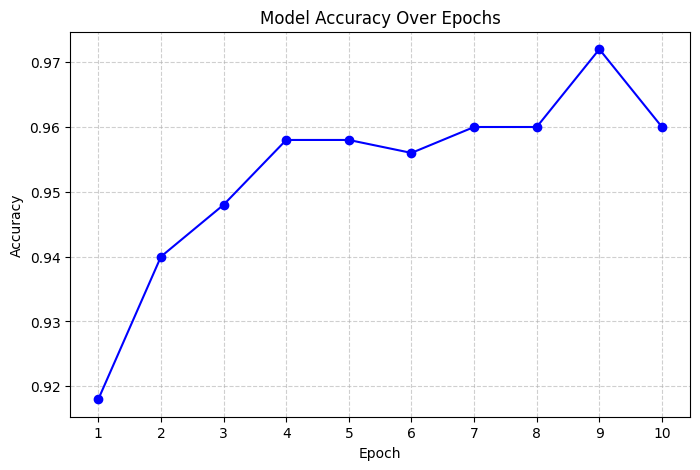

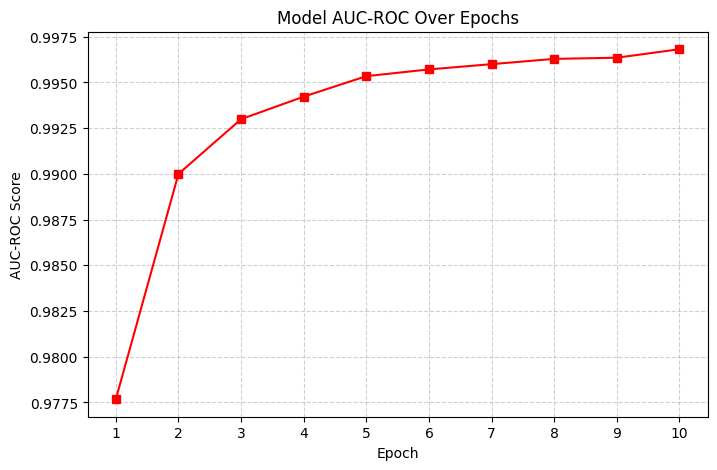


Model Performance Metrics Over Epochs:
    accuracy  precision  recall      f1     auc
1      0.918     0.9442  0.8871  0.9148  0.9777
2      0.940     0.9698  0.9073  0.9375  0.9900
3      0.948     0.9237  0.9758  0.9490  0.9930
4      0.958     0.9871  0.9274  0.9563  0.9942
5      0.958     0.9913  0.9234  0.9562  0.9953
6      0.956     0.9956  0.9153  0.9538  0.9957
7      0.960     0.9914  0.9274  0.9583  0.9960
8      0.960     0.9914  0.9274  0.9583  0.9963
9      0.972     0.9756  0.9677  0.9717  0.9964
10     0.960     0.9957  0.9234  0.9582  0.9968

Final Metrics (Last Epoch):
Accuracy: 0.9600
Precision: 0.9957
Recall: 0.9234
F1-score: 0.9582
AUC-ROC: 0.9968


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model_performance(model, test_loader, epochs):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    metrics_over_epochs = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'auc': []
    }

    for epoch in range(1, epochs+1):
        checkpoint_path = f'checkpoints_new/resnet18_epoch_{epoch}.pth'
        checkpoint = torch.load(checkpoint_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])

        predictions = []
        labels = []
        outputs = []

        with torch.no_grad():
            for images, label in test_loader:
                images, label = images.to(device), label.float().unsqueeze(1).to(device)
                output = model(images)
                pred = (output > 0.5).float()

                predictions.extend(pred.cpu().numpy().flatten())
                labels.extend(label.cpu().numpy().flatten())
                outputs.extend(output.cpu().numpy().flatten())

        accuracy = accuracy_score(labels, predictions)
        precision = precision_score(labels, predictions)
        recall = recall_score(labels, predictions)
        f1 = f1_score(labels, predictions)
        auc = roc_auc_score(labels, outputs)

        metrics_over_epochs['accuracy'].append(accuracy)
        metrics_over_epochs['precision'].append(precision)
        metrics_over_epochs['recall'].append(recall)
        metrics_over_epochs['f1'].append(f1)
        metrics_over_epochs['auc'].append(auc)

    # Plot Accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs+1), metrics_over_epochs['accuracy'], marker='o', linestyle='-', color='b')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Over Epochs')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(range(1, epochs+1))
    plt.show()

    # Plot AUC-ROC
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs+1), metrics_over_epochs['auc'], marker='s', linestyle='-', color='r')
    plt.xlabel('Epoch')
    plt.ylabel('AUC-ROC Score')
    plt.title('Model AUC-ROC Over Epochs')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xticks(range(1, epochs+1))
    plt.show()

    # Create DataFrame for tabular metrics
    metrics_df = pd.DataFrame(metrics_over_epochs, index=range(1, epochs+1))
    print("\nModel Performance Metrics Over Epochs:")
    print(metrics_df.round(4))

    # Print Final Metrics
    print("\nFinal Metrics (Last Epoch):")
    print(f"Accuracy: {metrics_over_epochs['accuracy'][-1]:.4f}")
    print(f"Precision: {metrics_over_epochs['precision'][-1]:.4f}")
    print(f"Recall: {metrics_over_epochs['recall'][-1]:.4f}")
    print(f"F1-score: {metrics_over_epochs['f1'][-1]:.4f}")
    print(f"AUC-ROC: {metrics_over_epochs['auc'][-1]:.4f}")

# Evaluate model performance over epochs
evaluate_model_performance(model, test_loader, epochs=10)


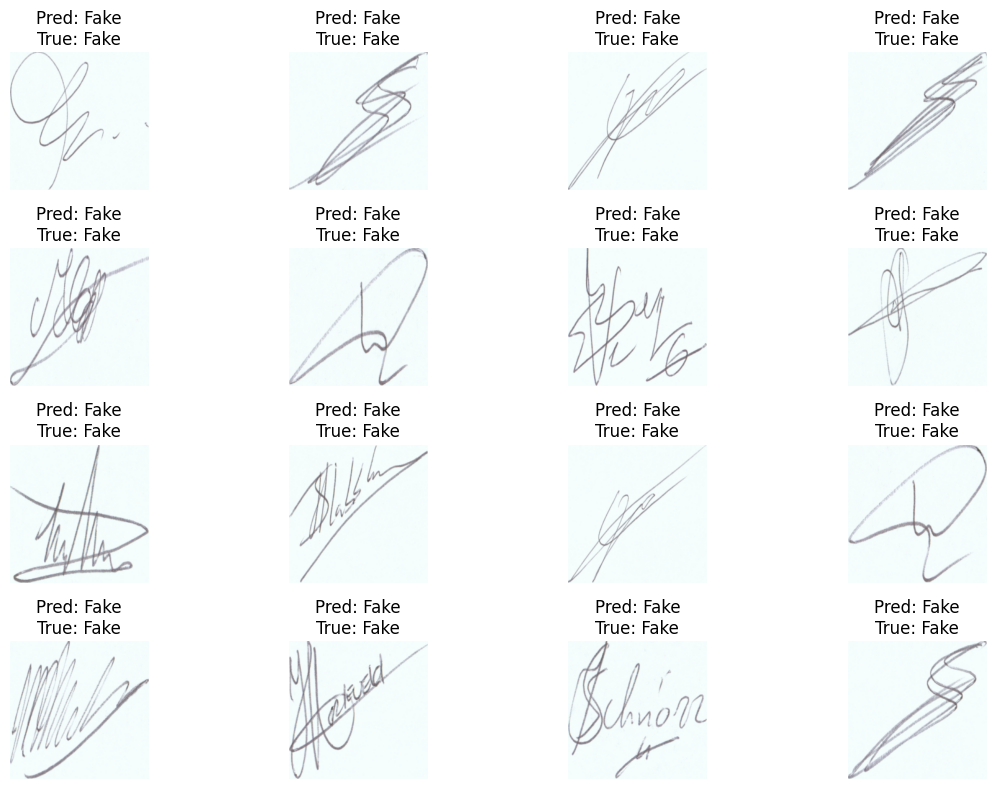

In [ ]:
import matplotlib.pyplot as plt

def visualize_predictions_with_classes(model, test_loader, class_names=['Class A', 'Class B']):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    # Load a batch of images
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.float().unsqueeze(1).to(device)

    # Make predictions
    outputs = model(images)
    predictions = (outputs > 0.5).float()

    # Denormalize images
    mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 3, 1, 1).to(device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(1, 3, 1, 1).to(device)
    images_denorm = images * std + mean

    # Plot images with predictions
    plt.figure(figsize=(12, 8))
    for i in range(min(16, len(images))):
        plt.subplot(4, 4, i+1)
        img = images_denorm[i].permute(1, 2, 0).cpu().numpy()
        plt.imshow(img)
        pred_label = class_names[int(predictions[i].item())]
        true_label = class_names[int(labels[i].item())]
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize predictions with updated class names
visualize_predictions_with_classes(model, test_loader, class_names=['Fake', 'Real'])


#***Baseline Model Comparison(VGG16 and RESNET50)***




Using device: cuda
Train Size: 1319, Validation Size: 330
Training VGG16...
Epoch [1/10]
Train Loss: 0.5786, Train Accuracy: 69.52%
Val Loss: 0.4783, Val Accuracy: 82.12%
Epoch [2/10]
Train Loss: 0.4429, Train Accuracy: 81.43%
Val Loss: 0.4307, Val Accuracy: 82.12%
Epoch [3/10]
Train Loss: 0.4063, Train Accuracy: 81.20%
Val Loss: 0.4021, Val Accuracy: 83.33%
Epoch [4/10]
Train Loss: 0.3787, Train Accuracy: 83.85%
Val Loss: 0.3937, Val Accuracy: 83.64%
Epoch [5/10]
Train Loss: 0.3641, Train Accuracy: 83.40%
Val Loss: 0.3770, Val Accuracy: 84.85%
Epoch [6/10]
Train Loss: 0.3639, Train Accuracy: 84.31%
Val Loss: 0.3609, Val Accuracy: 84.24%
Epoch [7/10]
Train Loss: 0.3591, Train Accuracy: 84.76%
Val Loss: 0.3498, Val Accuracy: 84.55%
Epoch [8/10]
Train Loss: 0.3458, Train Accuracy: 85.06%
Val Loss: 0.3480, Val Accuracy: 85.15%
Epoch [9/10]
Train Loss: 0.3478, Train Accuracy: 85.75%
Val Loss: 0.3473, Val Accuracy: 84.85%
Epoch [10/10]
Train Loss: 0.3479, Train Accuracy: 84.53%
Val Loss: 0.

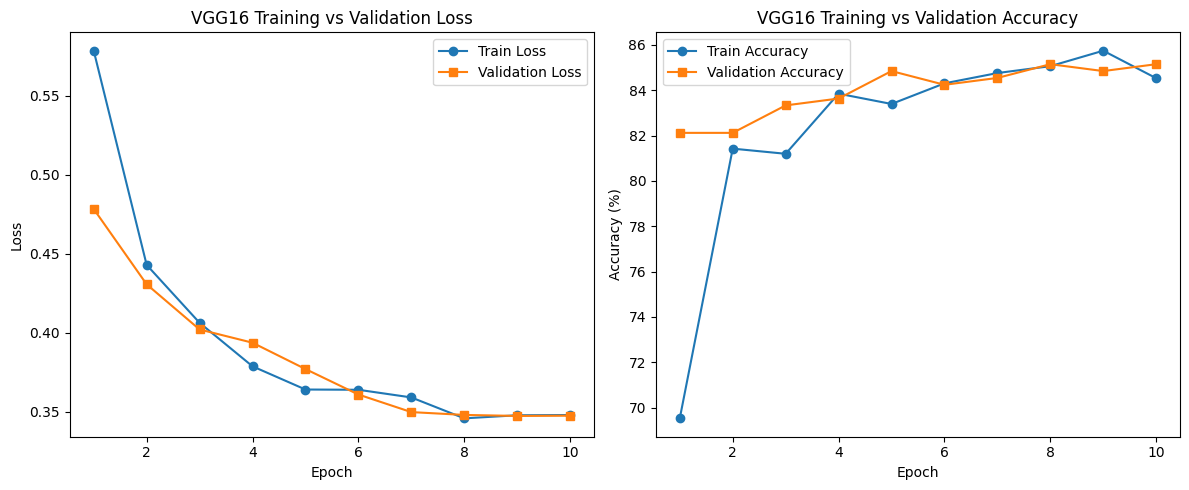

Training ResNet50...
Epoch [1/10]
Train Loss: 0.4890, Train Accuracy: 81.73%
Val Loss: 0.3414, Val Accuracy: 92.42%
Epoch [2/10]
Train Loss: 0.2860, Train Accuracy: 92.57%
Val Loss: 0.2307, Val Accuracy: 95.45%
Epoch [3/10]
Train Loss: 0.2261, Train Accuracy: 93.56%
Val Loss: 0.1939, Val Accuracy: 95.45%
Epoch [4/10]
Train Loss: 0.2394, Train Accuracy: 91.51%
Val Loss: 0.1845, Val Accuracy: 95.15%
Epoch [5/10]
Train Loss: 0.1848, Train Accuracy: 94.24%
Val Loss: 0.1617, Val Accuracy: 95.15%
Epoch [6/10]
Train Loss: 0.1786, Train Accuracy: 94.54%
Val Loss: 0.1495, Val Accuracy: 96.67%
Epoch [7/10]
Train Loss: 0.1655, Train Accuracy: 94.69%
Val Loss: 0.1408, Val Accuracy: 96.36%
Epoch [8/10]
Train Loss: 0.1594, Train Accuracy: 94.77%
Val Loss: 0.1394, Val Accuracy: 96.67%
Epoch [9/10]
Train Loss: 0.1390, Train Accuracy: 96.06%
Val Loss: 0.1404, Val Accuracy: 96.97%
Epoch [10/10]
Train Loss: 0.1595, Train Accuracy: 94.77%
Val Loss: 0.1422, Val Accuracy: 96.97%


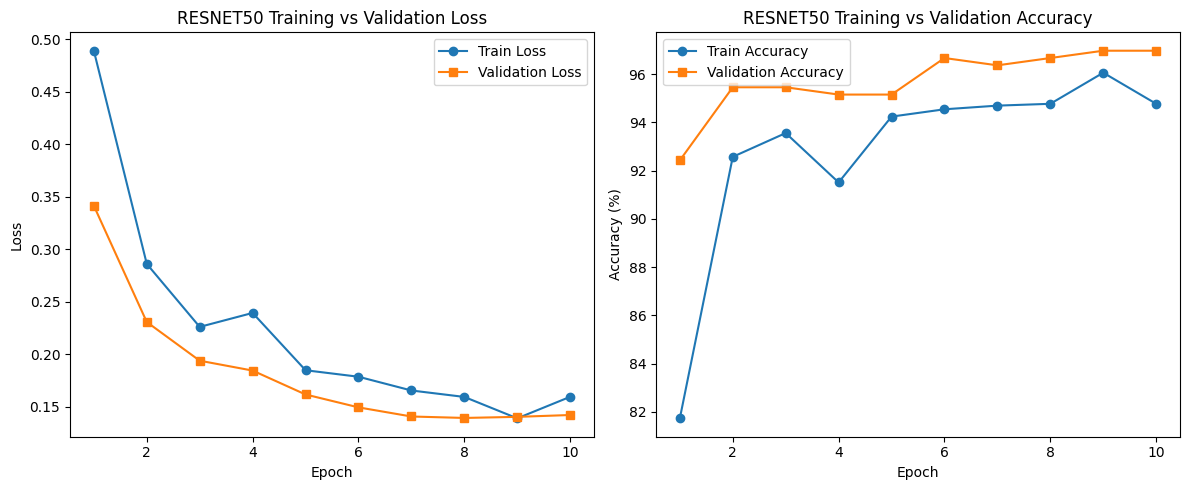

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import os

# Device Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data Paths
train_dir = '/content/biinary/'

# Data Augmentation for Training Set
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Only Resize and Normalize for Validation Set (No Augmentation)
val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Dataset
full_dataset = SignatureDataset(root_dir=train_dir, transform=None)

# Split into Train and Validation Sets (80% Train, 20% Validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

train_dataset.dataset.transform = train_transforms
val_dataset.dataset.transform = val_transforms

print(f"Train Size: {len(train_dataset)}, Validation Size: {len(val_dataset)}")

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Function to Modify Models for Binary Classification
def modify_model(model):
    # Freeze all layers except the last layer
    for param in model.parameters():
        param.requires_grad = False

    # Replace the final layer with a binary classification head
    if isinstance(model, models.VGG):
        num_features = model.classifier[-1].in_features
        model.classifier[-1] = nn.Sequential(
            nn.Linear(num_features, 1),
            nn.Sigmoid()
        )
    elif isinstance(model, models.ResNet):
        num_features = model.fc.in_features
        model.fc = nn.Sequential(
            nn.Linear(num_features, 1),
            nn.Sigmoid()
        )

    return model.to(device)

# Training Function (Same for All Models)
def train_model(model_name, train_loader, val_loader):
    if model_name == "vgg16":
        model = modify_model(models.vgg16(pretrained=True))
    elif model_name == "resnet50":
        model = modify_model(models.resnet50(pretrained=True))

    # Loss and Optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

    num_epochs = 10
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        # Training Phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.float().unsqueeze(1).to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            predictions = (outputs > 0.5).float()
            correct += (predictions == labels).sum().item()
            total += labels.size(0)
            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Validation Phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.float().unsqueeze(1).to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                predictions = (outputs > 0.5).float()
                val_correct += (predictions == labels).sum().item()
                val_total += labels.size(0)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_acc = 100 * val_correct / val_total

        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f}%")
        print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.2f}%")

        scheduler.step()

    # Plot Training & Validation Loss and Accuracy
    plt.figure(figsize=(12, 5))

    # Loss Curve
    plt.subplot(1, 2, 1)
    plt.plot(range(1, num_epochs+1), train_losses, label='Train Loss', marker='o')
    plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', marker='s')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name.upper()} Training vs Validation Loss')
    plt.legend()

    # Accuracy Curve
    plt.subplot(1, 2, 2)
    plt.plot(range(1, num_epochs+1), train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy', marker='s')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'{model_name.upper()} Training vs Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train VGG16 Model
print("Training VGG16...")
train_model("vgg16", train_loader, val_loader)

# Train ResNet50 Model
print("Training ResNet50...")
train_model("resnet50", train_loader, val_loader)


# **MODEL TESTING WITH RANDOM IMAGES TO GET PREDICTIONS**

Model loaded successfully.


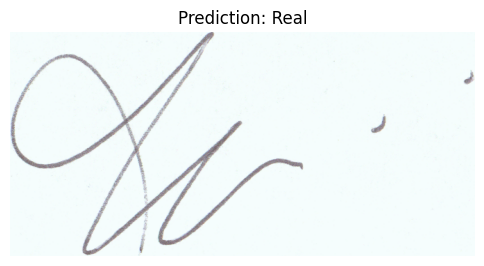

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the transformation for the input image
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the model
model = models.resnet18()
num_features = model.fc.in_features
model.fc = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)

# Load the checkpoint
checkpoint_path = '/content/checkpoints_new/resnet18_epoch_10.pth'
checkpoint = torch.load(checkpoint_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
model.load_state_dict(checkpoint['model_state_dict'])
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
model.eval()
print("Model loaded successfully.")

# Function to test a new image
def test_new_image(image_path, model):
    # Load and preprocess the image
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    image = Image.open(image_path).convert("RGB")
    transformed_image = test_transforms(image).unsqueeze(0).to(device)

    # Make prediction
    with torch.no_grad():
        output = model(transformed_image)
        prediction = (output > 0.5).float().item()

    # Map prediction to class label
    class_names = ['Real', 'Fake']
    predicted_label = class_names[int(prediction)]

    # Display the image and prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.title(f"Prediction: {predicted_label}")
    plt.axis('off')
    plt.show()

# Specify the path to the new image you want to test
new_image_path = "/content/test/real/01_049.png"

# Test the new image
test_new_image(new_image_path, model)


# **DOCUMENTATION**

### **Dataset Creation**
- **Device Configuration**:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

- **Fake Data Generation**:
Notebook link Using GAN- Generative Adversarial Network

[NOTEBOOK LINK](https://colab.research.google.com/drive/1IaBfbk8wvS54_07zRHSMfLG6Ylv6ogbv#scrollTo=tLyUGWLWFTc5)





Configures the device to use GPU (cuda) if available; otherwise, it defaults to CPU.

- **Data Preprocessing**:
- **Training Data Augmentation**:
  ```
  train_transforms = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.RandomHorizontalFlip(p=0.5),
      transforms.RandomRotation(10),
      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
      transforms.RandomGrayscale(p=0.1),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ])
  ```
  Resizes images to 224x224 (required input size for ResNet18).
  Applies random augmentations (e.g., horizontal flip, rotation) to increase dataset diversity and reduce overfitting.
  Normalizes pixel values using ImageNet mean and standard deviation.

- **Validation Data Preprocessing**:
  ```
  val_transforms = transforms.Compose([
      transforms.Resize((224, 224)),
      transforms.ToTensor(),
      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ])
  ```
  Only resizes and normalizes validation data (no augmentation) to ensure consistent evaluation.

- **Dataset Splitting**:
Splits the dataset into 80% training and 20% validation.
Assigns the appropriate transformations to training and validation datasets.

### **Model Training and Classification**
- **Model Initialization**:
Loads a pretrained ResNet18 model.

**Freezes all layers except the final fully connected layer to prevent updating weights during training.**
Replaces the final layer with a binary classification head (Sigmoid activation for probability output).

- **Training Function**:
      Calculates Training and validation accuracy for 10 epochs

### **Testing and Evaluation**
- **Test Data Preparation**:

**Device Configuration**:
The model is moved to a GPU if available for faster computations. This is achieved using the following code:device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

**Loss Function and Optimizer** :
**Binary Cross-Entropy (BCE)** loss is used for binary classification, and **Adam** optimizer is chosen with a learning rate of 0.001. A step learning rate scheduler is used to adjust the learning rate every 7 epochs.

**Training Phase**
In each epoch, the model processes batches of images and labels.

- **Forward Pass**: For each batch, it computes the output using the model.
- **Loss Calculation**: Calculates the loss using BCE.
- **Backward Pass**: Performs backpropagation to update the weights of the final layer.
- **Accuracy Calculation**: Calculates the accuracy by comparing predictions (based on a threshold of 0.5) with actual labels.



.

- **Model Evaluation**:

We evaluated the signature classification models using Accuracy, F1-score, Recall, and ROC-AUC score across ResNet18, ResNet50, and VGG16 architectures. VGG16 showed lower performance due to its deeper structure requiring more data. ResNet18 performed well as a lightweight alternative. The baseline comparison highlights ResNet18 as the best-performing model for signature verification.